In [1]:
import pandas as pd
import numpy as np
!pip install scikit-learn==1.3.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
df = pd.read_csv('/content/bike_crash-B-PF307G4M .csv')

# Data Preprocessing

In [ ]:
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Person Helmet
0,No,No,False,15262,No,Incapacitating Injury,239,1,2010,Friday,Non Intersection,Main/Proper Lane,45,Dry,Marked Lanes,"Worn, Damaged"
1,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
2,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
3,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
4,No,No,False,22775,No,Non-Incapacitating Injury,2300,1,2010,Monday,Intersection Related,Main/Proper Lane,45,Dry,None,Not Worn


In [3]:
df.drop(columns = ['$1000 Damage to Any One Person\'s Property','Active School Zone Flag','At Intersection Flag','Average Daily Traffic Amount','Construction Zone Flag','Crash Total Injury Count','Crash Year','Intersection Related','Traffic Control Type'],inplace =True)

In [4]:
df.head()

,Crash Severity,Crash Time,Day of Week,Roadway Part,Speed Limit,Surface Condition,Person Helmet
0,Incapacitating Injury,239,Friday,Main/Proper Lane,45,Dry,"Worn, Damaged"
1,Non-Incapacitating Injury,310,Friday,Main/Proper Lane,35,Dry,Not Worn
2,Non-Incapacitating Injury,310,Friday,Main/Proper Lane,35,Dry,Not Worn
3,Non-Incapacitating Injury,310,Friday,Main/Proper Lane,35,Dry,Not Worn
4,Non-Incapacitating Injury,2300,Monday,Main/Proper Lane,45,Dry,Not Worn


In [ ]:
df.describe()

,Crash Time,Speed Limit
count,2463.000000,2463.000000
mean,1404.700771,26.410881
std,558.967560,17.005282
min,1.000000,-1.000000
25%,1008.000000,0.000000
50%,1532.000000,30.000000
75%,1822.500000,35.000000
max,2358.000000,65.000000


In [ ]:
df['Crash Severity'].value_counts()

Non-Incapacitating Injury    1474
Possible Injury               556
Incapacitating Injury         254
Not Injured                   163
Killed                         16
Name: Crash Severity, dtype: int64

In [5]:
# converting 'crash severity' to high, medium, and low risk categories

# Define the mapping from original crash severities to risk levels
risk_mapping = {
    'Non-Incapacitating Injury': 'Medium',
    'Possible Injury': 'Low',
    'Incapacitating Injury': 'High',
    'Not Injured': 'Low',
    'Killed': 'High'
}

df['Crash Severity'] = df['Crash Severity'].map(risk_mapping)


In [6]:
from sklearn.utils import resample

# Find the number of samples in the majority class
majority_class_size = df['Crash Severity'].value_counts().max()

# Upsample the minority classes
df_upsampled_list = []
for severity in df['Crash Severity'].unique():
    df_severity = df[df['Crash Severity'] == severity]
    df_severity_upsampled = resample(df_severity,
                                     replace=True, # Sample with replacement
                                     n_samples=majority_class_size, # Match number in majority class
                                     random_state=123) # Ensuring reproducibility
    df_upsampled_list.append(df_severity_upsampled)

# Concatenate the upsampled minority classes with the rest of the data
df_balanced = pd.concat(df_upsampled_list)

# Display new class counts
print(df_balanced['Crash Severity'].value_counts())


High      1474
Medium    1474
Low       1474
Name: Crash Severity, dtype: int64


In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4422 entries, 861 to 1126
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Crash Severity     4422 non-null   object
 1   Crash Time         4422 non-null   int64 
 2   Day of Week        4422 non-null   object
 3   Roadway Part       4422 non-null   object
 4   Speed Limit        4422 non-null   int64 
 5   Surface Condition  4422 non-null   object
 6   Person Helmet      4422 non-null   object
dtypes: int64(2), object(5)
memory usage: 276.4+ KB


In [7]:
# Standardize "Crash Time" to a four-digit HHMM format with leading zeros
df_balanced['Crash Time'] = df_balanced['Crash Time'].apply(lambda x: f"{x:04d}")
# Check the first few standardized entries
df_balanced['Crash Time'].head()


861     0828
2168    1330
162     2055
671     1128
927     1819
Name: Crash Time, dtype: object

In [ ]:
df_balanced['Crash Time'] = df_balanced['Crash Time'].astype(int)

In [ ]:
skewness = df_balanced['Speed Limit'].skew()

print(f"Skewness of the 'Speed Limit' column: {skewness}")

Skewness of the 'Speed Limit' column: -0.6385159211628768


In [8]:
# Calculate the median speed limit, excluding the -1 values
median_speed_limit = df_balanced[df_balanced['Speed Limit'] > 0]['Speed Limit'].median()

# Replace -1 values with the median
df_balanced['Speed Limit'] = df_balanced['Speed Limit'].replace(-1, median_speed_limit)


In [9]:
# Mapping 'Surface condition' into smaller cateogries
surface_condition_mapping = {
    'Dry': 'Dry',
    'Wet': 'Wet',
    'Unknown': 'Other',
    'Other (Explain In Narrative)': 'Other',
    'Ice': 'Other',
    'Sand, Mud, Dirt': 'Other',
    'Standing Water': 'Other'
}

# Apply the mapping to the 'Surface Condition' column
df_balanced['Surface Condition'] = df_balanced['Surface Condition'].map(surface_condition_mapping)

In [ ]:
df_balanced['Person Helmet'].value_counts()

Not Worn             2467
Unknown If Worn       826
Worn, Not Damaged     512
Worn, Unk Damage      327
Worn, Damaged         290
Name: Person Helmet, dtype: int64

In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4422 entries, 861 to 1126
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Crash Severity     4422 non-null   object
 1   Crash Time         4422 non-null   int64 
 2   Day of Week        4422 non-null   object
 3   Roadway Part       4422 non-null   object
 4   Speed Limit        4422 non-null   int64 
 5   Surface Condition  4422 non-null   object
 6   Person Helmet      4422 non-null   object
dtypes: int64(2), object(5)
memory usage: 276.4+ KB


In [10]:
# Mapping 'Person helmet' into smaller cateogries
helmet_mapping_conservative = {
    'Not Worn': 'Not Worn',
    'Unknown If Worn': 'Not Worn',
    'Worn, Not Damaged': 'Worn',
    'Worn, Unk Damage': 'Worn',
    'Worn, Damaged': 'Worn'
}

# Apply the mapping to simplify the "Person Helmet" column
df_balanced['Person Helmet'] = df_balanced['Person Helmet'].map(helmet_mapping_conservative)


In [ ]:
df_balanced.head()

,Crash Severity,Crash Time,Day of Week,Roadway Part,Speed Limit,Surface Condition,Person Helmet
861,High,828,Tuesday,Other (Explain In Narrative),5,Dry,Not Worn
2168,High,1330,Tuesday,Main/Proper Lane,30,Dry,Worn
162,High,2055,Friday,Main/Proper Lane,45,Dry,Not Worn
671,High,1128,Tuesday,Main/Proper Lane,45,Dry,Not Worn
927,High,1819,Monday,Main/Proper Lane,35,Dry,Not Worn


# EDA

In [ ]:
df['Time of Day'] = df['Crash Time'].apply(lambda x: 'Day' if 600 <= x <= 1800 else 'Night')


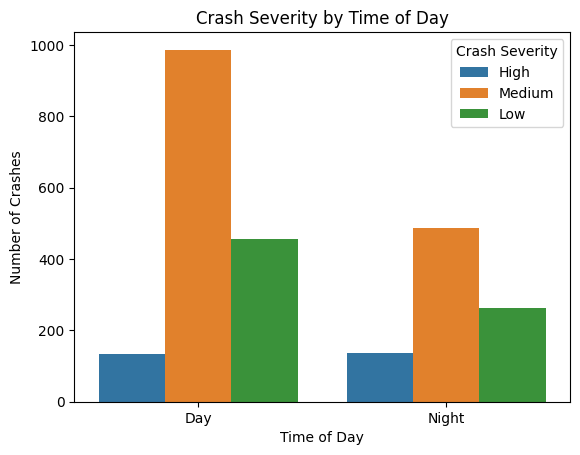

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Crash Severity' has been mapped to 'High', 'Medium', 'Low' categories
sns.countplot(x='Time of Day', hue='Crash Severity', data=df, order=['Day', 'Night'], hue_order=['High', 'Medium', 'Low'])
plt.title('Crash Severity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crashes')
plt.show()


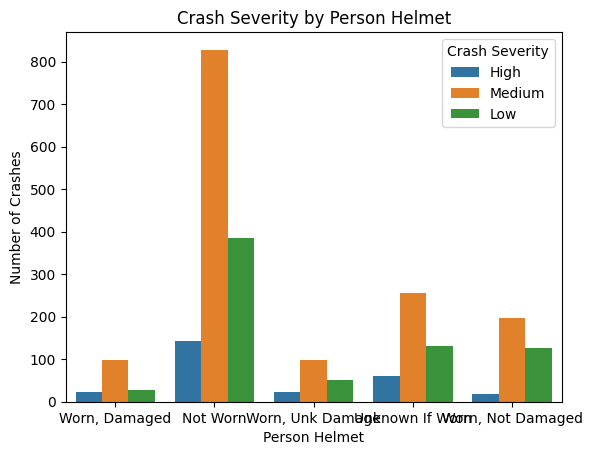

In [ ]:
# Example for visualizing crash severity by another variable (helmet usage or surface condition)
variable = 'Person Helmet'  # or 'Surface Condition Mapped' for Hypothesis 3
sns.countplot(x=variable, hue='Crash Severity', data=df, hue_order=['High', 'Medium', 'Low'])
plt.title(f'Crash Severity by {variable}')
plt.xlabel(variable)
plt.ylabel('Number of Crashes')
plt.legend(title='Crash Severity')
plt.show()


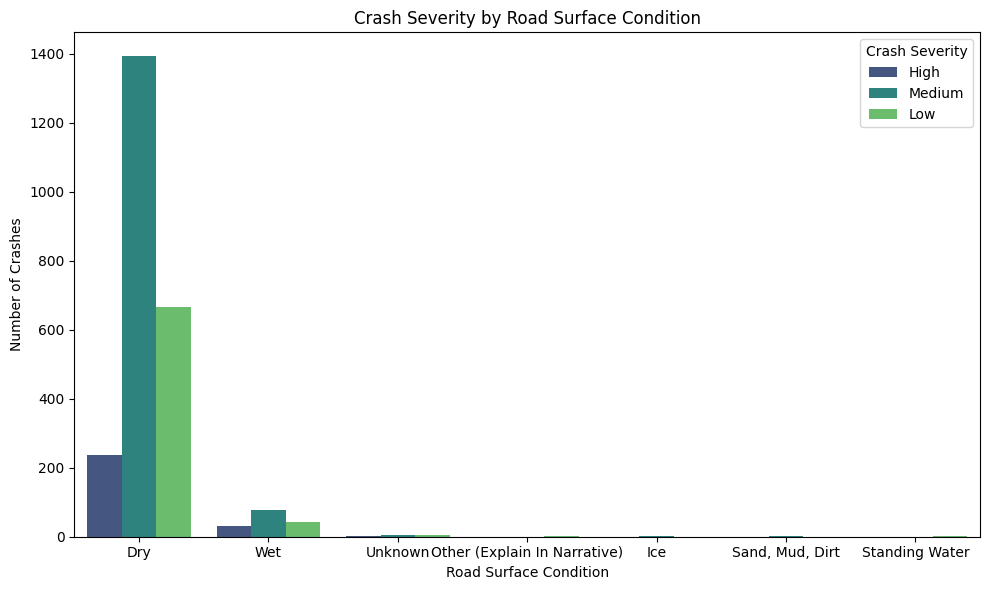

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Surface Condition', hue='Crash Severity', data=df, palette='viridis')
plt.title('Crash Severity by Road Surface Condition')
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Crashes')
plt.legend(title='Crash Severity', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()

# Decision Tree Model

In [11]:
df.drop('Time of Day',inplace = True, axis =1)

KeyError: "['Time of Day'] not found in axis"

In [12]:
df_balanced['Person Helmet'].value_counts()

Not Worn    3293
Worn        1129
Name: Person Helmet, dtype: int64

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Separate features and target variable
X = df_balanced.drop('Crash Severity', axis=1)  # Features
y = df_balanced['Crash Severity']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'), ['Day of Week', 'Roadway Part', 'Surface Condition', 'Person Helmet']),  # One-hot encoding for categorical features
    ('passthrough', 'passthrough', ['Speed Limit', 'Crash Time'])  # Pass through integer features without transformation
], remainder='passthrough')

# Fit the transformer on the training data
transformer.fit(X_train)

# Transform the training and testing data
X_train_transformed = transformer.transform(X_train)
X_test_transformed = transformer.transform(X_test)

# Create the decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the decision tree on the transformed data
model.fit(X_train_transformed, y_train)

# 3. Model Evaluation
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test_transformed)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.91      0.98      0.95       319
         Low       0.87      0.91      0.89       274
      Medium       0.91      0.81      0.86       292

    accuracy                           0.90       885
   macro avg       0.90      0.90      0.90       885
weighted avg       0.90      0.90      0.90       885



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import joblib

# Save the transformer and model
joblib.dump(transformer, 'transformer.joblib')
joblib.dump(model, 'decision_tree_model.joblib')


['decision_tree_model.joblib']

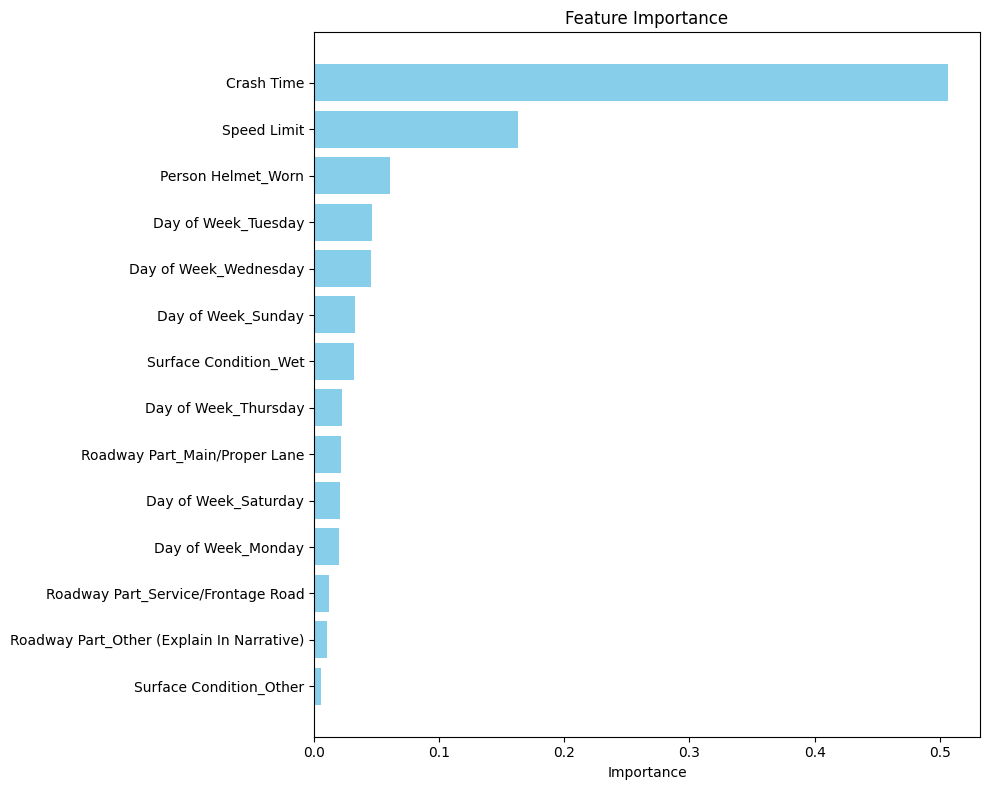

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Function to get feature names from ColumnTransformer
def get_feature_names(column_transformer):
    output_features = []

    # Loop over all transformers in the ColumnTransformer
    for name, estimator, columns in column_transformer.transformers_:
        if name == 'passthrough':
            # If the transformer is 'passthrough', the feature names come directly from the columns
            output_features.extend(columns)
        elif hasattr(estimator, 'get_feature_names_out'):
            # If the transformer has a 'get_feature_names_out' method, use it
            output_features.extend(estimator.get_feature_names_out(columns))
        else:
            # Otherwise, we assume the feature names are the same as the columns
            output_features.extend(columns)

    return output_features

# Now get the feature names
transformed_feature_names = get_feature_names(transformer)

# Ensure the length of 'transformed_feature_names' matches 'model.feature_importances_'
assert len(transformed_feature_names) == len(model.feature_importances_)

# Now create the DataFrame using the transformed feature names
feature_importance_df = pd.DataFrame({
    'Feature': transformed_feature_names,
    'Importance': model.feature_importances_
})

# Sort the DataFrame by importance
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Plot using Matplotlib
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
